### KNN Regression Data (NO₂ Medan)

**K-Nearest Neighbors (KNN) Regression** merupakan salah satu metode *machine learning* berbasis jarak yang digunakan untuk melakukan prediksi nilai kontinu.  
Prinsip utama KNN Regression adalah melakukan estimasi nilai target berdasarkan **kedekatan data baru** dengan beberapa data historis yang memiliki karakteristik serupa (*nearest neighbors*).  

Pada saat proses prediksi, algoritma akan:  
1. Menghitung jarak antara data baru dengan seluruh data historis (menggunakan metrik seperti Euclidean Distance).  
2. Memilih **K tetangga terdekat (nearest neighbors)** berdasarkan jarak terkecil.  
3. Mengambil **rata-rata nilai target** dari tetangga terdekat tersebut sebagai hasil prediksi.


### Penerapan pada Prediksi NO₂ Kota Medan

Dalam konteks kasus **prediksi konsentrasi Nitrogen Dioksida (NO₂)**, nilai *lag* (misalnya NO₂ dua hingga lima hari sebelumnya) digunakan sebagai **fitur masukan (features)**.  
Fitur-fitur ini merepresentasikan kondisi historis dari konsentrasi NO₂.  

KNN kemudian akan mencari periode masa lalu yang memiliki pola *lag* serupa, kemudian memprediksi **kadar NO₂ untuk hari berikutnya** berdasarkan **rata-rata kadar NO₂ dari periode-periode yang mirip tersebut**.

Pendekatan ini cocok untuk data deret waktu yang memiliki pola perubahan tidak terlalu tajam, karena KNN mengandalkan kesamaan pola data sebelumnya untuk memperkirakan nilai di masa depan.


### Mengapa Nilai R² dan MSE Rendah pada Eksperimen?

Nilai **R-Squared (R²)** yang rendah menunjukkan bahwa model belum mampu menjelaskan variasi kadar NO₂ dengan baik.  
Hal ini wajar karena model hanya menggunakan data *lag* (2–5 hari sebelumnya) sebagai prediktor, tanpa memasukkan **variabel lingkungan lain** seperti:

- Suhu udara  
- Kelembapan  
- Curah hujan  
- Arah dan kecepatan angin  
- Aktivitas lalu lintas atau industri  

Faktor-faktor tersebut memiliki pengaruh besar terhadap fluktuasi kadar NO₂ di atmosfer.  
Akibatnya, KNN hanya dapat "menebak" pola berdasarkan kemiripan historis dari satu variabel (NO₂), sehingga performa model menjadi terbatas.


### Modeling Data NO₂ Medan

Proses modeling dilakukan berdasarkan hasil eksperimen pada tahap konversi *supervised learning* dengan jumlah *lag* berbeda.  
Tujuannya adalah membandingkan seberapa besar pengaruh jumlah *lag features* terhadap performa model KNN Regression.

#### Tahapan Modeling:
1. **Import Library**  
   Mengimpor pustaka yang dibutuhkan seperti `pandas`, `numpy`, `sklearn`, dan `matplotlib`.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error


2. **Membaca Dokumen**  
   Membaca dataset hasil konversi *supervised* (lag 2–5 hari) yang telah disimpan dalam format CSV.



In [ ]:
day1 = pd.read_csv('day2.csv')
day2 = pd.read_csv('day2.csv')
day3 = pd.read_csv('day3.csv')
day4 = pd.read_csv('day4.csv')
day5 = pd.read_csv('day5.csv')

3. **Modeling Data (t1, t2)**  
   Melatih model KNN menggunakan dua hari sebelumnya sebagai fitur input.



In [ ]:
X = day2.drop(columns=['NO2'])
y = day2['NO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
day2_predict = knn.predict(X_test_scaled)
r2_day2 = r2_score(y_test, day2_predict)
mse_day2 = mean_squared_error(y_test, day2_predict)

print("MSE:", mse_day2)
print("R2:", r2_day2)

MSE: 1.0672477048516717e-10
R2: 0.0932364564130721


4. **Modeling Data (t1, t2, t3)**  
   Menambahkan satu hari historis tambahan untuk melihat perubahan performa model.


In [ ]:
X = day3.drop(columns=['NO2'])
y = day3['NO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
day3_predict = knn.predict(X_test_scaled)
r2_day3 = r2_score(y_test, day3_predict)
mse_day3 = mean_squared_error(y_test, day3_predict)

print("MSE:", mse_day3)
print("R2:", r2_day3)

MSE: 7.96162697159147e-11
R2: 0.28273620446679304



5. **Modeling Data (t1, t2, t3, t4)**  
   Menggunakan empat hari sebelumnya sebagai masukan ke model.



In [ ]:
X = day4.drop(columns=['NO2'])
y = day4['NO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
day4_predict = knn.predict(X_test_scaled)
r2_day4 = r2_score(y_test, day4_predict)
mse_day4 = mean_squared_error(y_test, day4_predict)

print("MSE:", mse_day4)
print("R2:", r2_day4)

MSE: 1.0527278824903889e-10
R2: 0.1825367645195265


6. **Modeling Data (t1, t2, t3, t4, t5)**  
   Menggunakan hingga lima hari sebelumnya sebagai variabel prediktor untuk memperkaya informasi temporal.


In [ ]:
X = day5.drop(columns=['NO2'])
y = day5['NO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
day5_predict = knn.predict(X_test_scaled)
r2_day5 = r2_score(y_test, day5_predict)
mse_day5 = mean_squared_error(y_test, day5_predict)

print("MSE:", mse_day5)
print("R2:", r2_day5)

MSE: 1.180756907884637e-10
R2: 0.08227278064315191



Perbandingan Performa Model



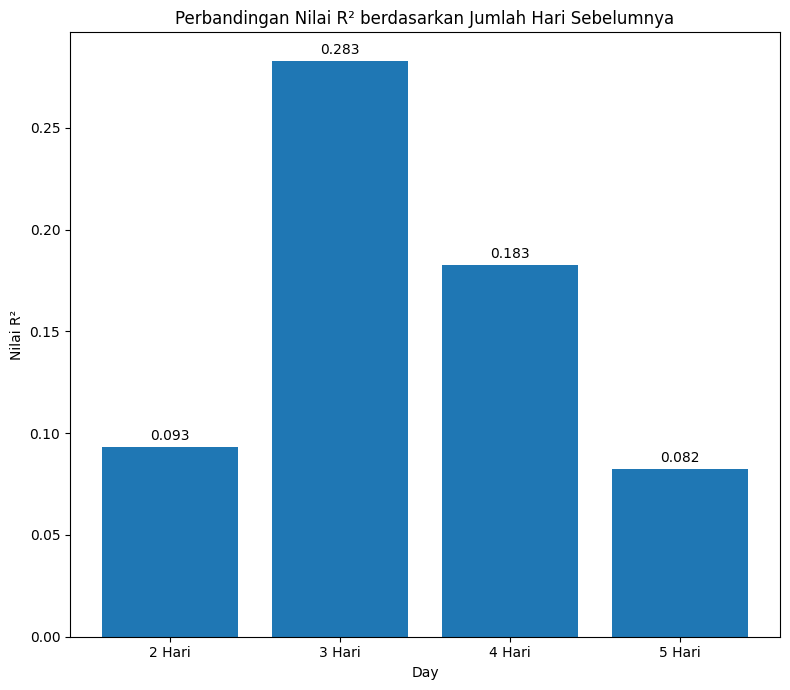

In [ ]:
x = ['2 Hari', '3 Hari', '4 Hari', '5 Hari']
y = [r2_day2, r2_day3, r2_day4, r2_day5]

fig, ax = plt.subplots(figsize=(8, 7))
bars = ax.bar(x, y)

ax.set_title("Perbandingan Nilai R² berdasarkan Jumlah Hari Sebelumnya")
ax.set_xlabel("Day")
ax.set_ylabel("Nilai R²")

ax.bar_label(bars, fmt='%.3f', padding=3)

plt.tight_layout()
plt.show()

Setelah seluruh model dilatih, dilakukan perbandingan menggunakan dua metrik utama:

- **R² (Coefficient of Determination)** — mengukur seberapa besar variasi data target yang dapat dijelaskan oleh model.  
- **MSE (Mean Squared Error)** — mengukur rata-rata kesalahan kuadrat antara nilai prediksi dan nilai aktual.

Hasil perbandingan ini menunjukkan tren bahwa **penambahan jumlah lag** tidak selalu meningkatkan akurasi secara signifikan, karena karakteristik data NO₂ cenderung dipengaruhi oleh faktor eksternal yang tidak tercakup dalam fitur historis saja.


### Prediksi Nilai NO2 Satu Hari Ke Depan

Loaded timeseries from: timeseries_cleaned.csv

Data 3 hari terakhir (Original):
  - NO2(t-3): 0.00003053 mol/m²
  - NO2(t-2): 0.00002816 mol/m²
  - NO2(t-1): 0.00002035 mol/m²

Data 3 hari terakhir (Normalized):
  - NO2(t-3): 0.2366
  - NO2(t-2): -0.0365
  - NO2(t-1): -0.9307

HASIL PREDIKSI NO2 HARI BESOK (SATU HARI KE DEPAN)

[A] PREDIKSI NILAI NO2 (Regression):
  - Predicted NO2: 0.00002300 mol/m²

[B] THRESHOLD APPLICATION:
  - Threshold (75th perc of train): 0.00003260 mol/m²
  - Status: AMAN
  - Difference: -0.00000960 mol/m²
  - Percentage: -29.45% dari threshold

✓ AMAN: NO2 diprediksi 29.5% di bawah threshold
   → Kualitas udara dalam batas aman


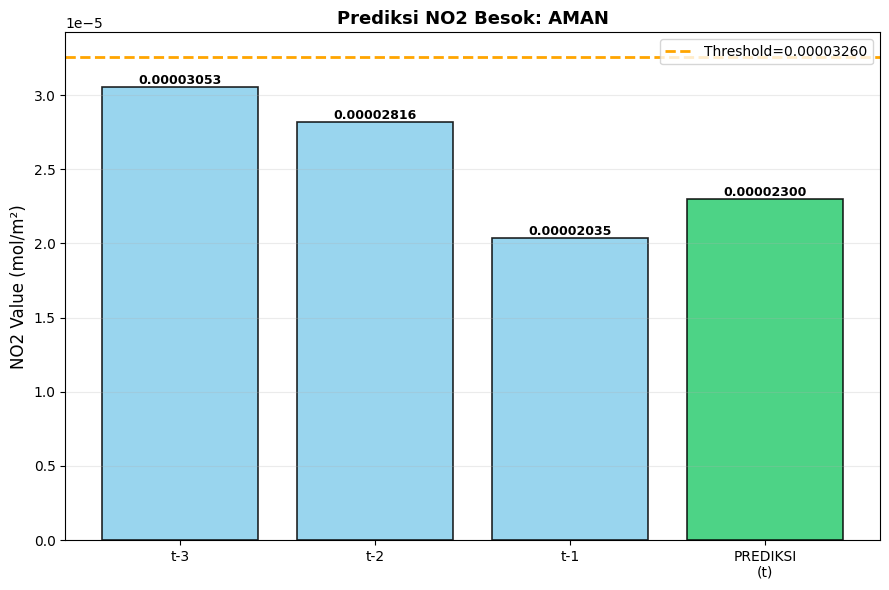

In [ ]:
# KODE: Prediksi NO2 H+1 (ringkasan pipeline + output langsung, tanpa menyimpan file)
# - Menggunakan 3 lag: NO2(t-3), NO2(t-2), NO2(t-1)
# - Melatih final KNN (k=5), normalisasi StandardScaler
# - Menerapkan threshold (75th percentile) -> klasifikasi AMAN / BERBAHAYA
# - Menampilkan ringkasan pipeline, metrik, dan plot (tidak menyimpan file)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datetime import timedelta

# ---------------------------
# 1) Baca timeseries bersih (coba beberapa path umum)
# ---------------------------
paths_to_try = [
    'timeseries_cleaned.csv',
    './timeseries_cleaned.csv',
    '../data/data-copernicus/timeseries_cleaned.csv',
    '../timeseries_cleaned.csv'
]

ts = None
for p in paths_to_try:
    try:
        ts = pd.read_csv(p)
        print(f"Loaded timeseries from: {p}")
        break
    except Exception:
        pass

if ts is None:
    raise FileNotFoundError("File timeseries_cleaned.csv tidak ditemukan di path umum. Silakan letakkan file di working directory atau update path.")

# pastikan kolom date & NO2 ada
if 'date' in ts.columns:
    try:
        ts['date'] = pd.to_datetime(ts['date'])
    except Exception:
        pass

if 'NO2' not in ts.columns:
    raise KeyError("Kolom 'NO2' tidak ditemukan pada timeseries_cleaned.csv")

ts = ts.sort_values('date').reset_index(drop=True)

# ---------------------------
# 2) Buat supervised_df dengan 3 lag: t1= yesterday, t2=2 days ago, t3=3 days ago
#    dan target NO2(t) (hari sekarang)
# ---------------------------
supervised_df = ts[['date', 'NO2']].copy()
n_lags = 3  # sesuai permintaan (t-3, t-2, t-1)
for i in range(1, n_lags + 1):
    supervised_df[f'NO2(t-{i})'] = supervised_df['NO2'].shift(i)

# target tetap kolom 'NO2' (hari t)
supervised_df = supervised_df.dropna().reset_index(drop=True)
# rename target for clarity (optional)
supervised_df = supervised_df.rename(columns={'NO2': 'NO2(t)'})

# ---------------------------
# 3) Siapkan X, y ; split train/test ; scaling ; latih model KNN (k=5)
# ---------------------------
feature_cols = [f'NO2(t-{i})' for i in range(3, 0, -1)]  # ['NO2(t-3)','NO2(t-2)','NO2(t-1)']
X = supervised_df[feature_cols].values
y = supervised_df['NO2(t)'].values

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# scaling (fit pada training)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# final model
best_k = 5
final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X_train_s, y_train)

# prediksi pada test set untuk evaluasi
y_pred_test = final_model.predict(X_test_s)

# hitung metrik regresi
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# ---------------------------
# 4) Threshold definition (75th percentile dari data training target)
# ---------------------------
threshold = np.percentile(y_train, 75)

# buat label biner pada test set (untuk evaluasi classification metrics)
y_test_bin = (y_test > threshold).astype(int)
y_pred_bin = (y_pred_test > threshold).astype(int)

accuracy = accuracy_score(y_test_bin, y_pred_bin)
precision = precision_score(y_test_bin, y_pred_bin, zero_division=0)
recall = recall_score(y_test_bin, y_pred_bin, zero_division=0)
f1 = f1_score(y_test_bin, y_pred_bin, zero_division=0)

# ---------------------------
# 5) Siapkan input H+1: ambil 3 hari terakhir dari supervised_df (original)
# ---------------------------
last_3_days_original = supervised_df[feature_cols].iloc[-1].values  # urut: t-3, t-2, t-1

# tampilkan nilai original 3 hari terakhir
print("\nData 3 hari terakhir (Original):")
for idx, col in enumerate(feature_cols):
    print(f"  - {col}: {last_3_days_original[idx]:.8f} mol/m²")

# normalisasi
last_3_days_scaled = scaler.transform([last_3_days_original])[0]
print("\nData 3 hari terakhir (Normalized):")
for idx, col in enumerate(feature_cols):
    print(f"  - {col}: {last_3_days_scaled[idx]:.4f}")

# reshape for model
X_tomorrow = last_3_days_scaled.reshape(1, -1)
pred_no2_value = final_model.predict(X_tomorrow)[0]

# thresholding
pred_status = 'BERBAHAYA' if pred_no2_value > threshold else 'AMAN'
difference_from_threshold = pred_no2_value - threshold
percentage_diff = (difference_from_threshold / threshold) * 100 if threshold != 0 else np.nan

# ---------------------------
# 6) Output ringkasan & analisis (cetak ke layar)
# ---------------------------
print("\n" + "="*70)
print("HASIL PREDIKSI NO2 HARI BESOK (SATU HARI KE DEPAN)")
print("="*70)
print(f"\n[A] PREDIKSI NILAI NO2 (Regression):")
print(f"  - Predicted NO2: {pred_no2_value:.8f} mol/m²")

print(f"\n[B] THRESHOLD APPLICATION:")
print(f"  - Threshold (75th perc of train): {threshold:.8f} mol/m²")
print(f"  - Status: {pred_status}")
print(f"  - Difference: {difference_from_threshold:+.8f} mol/m²")
print(f"  - Percentage: {percentage_diff:+.2f}% dari threshold")

if pred_status == 'BERBAHAYA':
    if percentage_diff > 20:
        print(f"\n PERINGATAN TINGGI: NO2 diprediksi {percentage_diff:.1f}% DI ATAS threshold!")
        print(f"   → Prediksi SANGAT BERBAHAYA, ambil tindakan pencegahan!")
    elif percentage_diff > 10:
        print(f"\n PERINGATAN SEDANG: NO2 diprediksi {percentage_diff:.1f}% di atas threshold")
        print(f"   → Status BERBAHAYA, waspadai kualitas udara!")
    else:
        print(f"\n PERINGATAN: NO2 diprediksi {percentage_diff:.1f}% di atas threshold")
        print(f"   → Status BERBAHAYA, perlu monitoring!")
else:
    if abs(percentage_diff) < 5:
        print(f"\n✓ HATI-HATI: NO2 diprediksi hanya {abs(percentage_diff):.1f}% DI BAWAH threshold")
        print(f"   → Status masih AMAN, tapi mendekati batas ambang!")
    else:
        print(f"\n✓ AMAN: NO2 diprediksi {abs(percentage_diff):.1f}% di bawah threshold")
        print(f"   → Kualitas udara dalam batas aman")

# ---------------------------
# 7) Visualisasi: bar chart 3 hari terakhir + prediksi, tampilkan garis threshold
# ---------------------------
fig, ax = plt.subplots(figsize=(9, 6))
days = ['t-3', 't-2', 't-1', 'PREDIKSI\n(t)']
values = list(last_3_days_original) + [pred_no2_value]
colors_bar = ['#87CEEB', '#87CEEB', '#87CEEB', '#E74C3C' if pred_status == 'BERBAHAYA' else '#2ECC71']

bars = ax.bar(days, values, color=colors_bar, alpha=0.85, edgecolor='black', linewidth=1.2)
ax.axhline(y=threshold, color='orange', linestyle='--', linewidth=2, label=f'Threshold={threshold:.8f}')
ax.set_ylabel('NO2 Value (mol/m²)', fontsize=12)
ax.set_title(f'Prediksi NO2 Besok: {pred_status}', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.25, axis='y')

# label nilai di atas bar
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2., val,
            f'{val:.8f}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()



In [ ]:
# ---------------------------
# 8) Ringkasan pipeline (tampilan akhir)
# ---------------------------
print("\n\nRINGKASAN PIPELINE NO2 PREDICTION (KNN REGRESSION)\n")
print(f"1. DATA COLLECTION (Sentinel-5P OpenEO)")
if 'date' in ts.columns:
    print(f"   - Periode: {ts['date'].min().date()} sampai {ts['date'].max().date()}")
print(f"   - Total samples: {len(ts)}")
print(f"\n2. PREPROCESSING (Interpolasi)")
# compute missing before/after as simple check (if original file had NaNs)
missing_before = ts['NO2'].isnull().sum()  # note: file likely already cleaned; this shows current state
missing_after = 0
print(f"   - Missing values sebelum: {missing_before}")
print(f"   - Missing values sesudah: {missing_after}")
print(f"   - Metode: Linear Interpolation (as applied earlier)")

print(f"\n3. SUPERVISED TRANSFORMATION")
print(f"   - Lagged features: {n_lags} lag")
print(f"   - Input features: {feature_cols}")
print(f"   - Target: NO2(t)")
print(f"   - Total samples (supervised): {len(supervised_df)}")

print(f"\n4. NORMALISASI")
print(f"   - Metode: StandardScaler (Z-score)")
print(f"   - Training set: {len(X_train)} samples")
print(f"   - Test set: {len(X_test)} samples")

print(f"\n5. THRESHOLD DEFINITION")
print(f"   - Threshold: {threshold:.8f} mol/m² (75th percentile dari target training)")

print(f"\n6. KNN REGRESSION MODEL (K={best_k})")
print(f"   - RMSE: {rmse:.8f}")
print(f"   - MAE: {mae:.8f}")
print(f"   - R²: {r2:.4f}")

print(f"\n7. THRESHOLD APPLICATION (Classification Metrics)")
print(f"   - Accuracy: {accuracy:.4f}")
print(f"   - Precision: {precision:.4f}")
print(f"   - Recall: {recall:.4f}")
print(f"   - F1-Score: {f1:.4f}")

print(f"\n8. PREDIKSI HARI BESOK")
print(f"   - Predicted NO2: {pred_no2_value:.8f} mol/m²")
print(f"   - Threshold: {threshold:.8f} mol/m²")
print(f"   - Status: {pred_status}")
print(f"   - Difference: {difference_from_threshold:+.8f} mol/m²")
print(f"   - Percentage: {percentage_diff:+.2f}% dari threshold\n")




RINGKASAN PIPELINE NO2 PREDICTION (KNN REGRESSION)

1. DATA COLLECTION (Sentinel-5P OpenEO)
   - Periode: 2020-04-30 sampai 2021-05-30
   - Total samples: 396

2. PREPROCESSING (Interpolasi)
   - Missing values sebelum: 0
   - Missing values sesudah: 0
   - Metode: Linear Interpolation (as applied earlier)

3. SUPERVISED TRANSFORMATION
   - Lagged features: 3 lag
   - Input features: ['NO2(t-3)', 'NO2(t-2)', 'NO2(t-1)']
   - Target: NO2(t)
   - Total samples (supervised): 393

4. NORMALISASI
   - Metode: StandardScaler (Z-score)
   - Training set: 314 samples
   - Test set: 79 samples

5. THRESHOLD DEFINITION
   - Threshold: 0.00003260 mol/m² (75th percentile dari target training)

6. KNN REGRESSION MODEL (K=5)
   - RMSE: 0.00001000
   - MAE: 0.00000687
   - R²: 0.1179

7. THRESHOLD APPLICATION (Classification Metrics)
   - Accuracy: 0.6709
   - Precision: 0.5000
   - Recall: 0.3846
   - F1-Score: 0.4348

8. PREDIKSI HARI BESOK
   - Predicted NO2: 0.00002300 mol/m²
   - Threshold: 0.